<a href="https://colab.research.google.com/github/thuc-github/MIS710-T12023/blob/main/Week%209/MIS710_Lab9_KMeans_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **MIS710 Lab 9 Week 9: Solutions**
Author: Associate Professor Lemai Nguyen

Objectives: 
1. To learn to build and test K-means clustering
2. To evaluate the model
3. To optimise k

Two case studies

# **1. Import libraries and functions**

In [1]:
# import libraries 
import pandas as pd #for data manipulation and analysis
import numpy as np
 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
!pip install pydotplus #interface for graph visualisation
!pip install graphviz #for graph visualisation

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **2. Case One: Churn Prediction**

**K-Means Clustering**

https://www.kaggle.com/datasets/blastchar/telco-customer-churn

**Context**
"Analyze all relevant customer data and identify hidden groupings of customers." [IBM Sample Data Sets]

**Content**
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

* Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

**Inspiration**
To identify customer segments.

New version from IBM:
https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

## **2.1. Loading data**

In [3]:
url='https://raw.githubusercontent.com/VanLan0/MIS710/main/Customers.csv'

In [4]:
#loading data
records = pd.read_csv(url)

records.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## **2.2. Data Preparation, Exploration and Visualisation**

### **Data cleansing**

* Inspect columns and correct data types
* Detecting and handling missing data


In [5]:
#Inspect columns and data types
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#totalcharges is wrongly documented as string
records['TotalCharges'] = records['TotalCharges'].apply(pd.to_numeric, errors='coerce')

In [7]:
#Inspect missing data
print(records.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [8]:
#As the distribution is skewed, replace the missing values with median
records['TotalCharges'].fillna(records['TotalCharges'].median(),inplace=True)


In [9]:
# Remove customer IDs from the data set
records = records.drop(['customerID'], axis = 1)

### **EDA**

* Analyse and visualise each variable
* Any strong correlation from the dataset?  
* How to deal with categorical features? 

In [10]:
#Inspect target variable
records.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

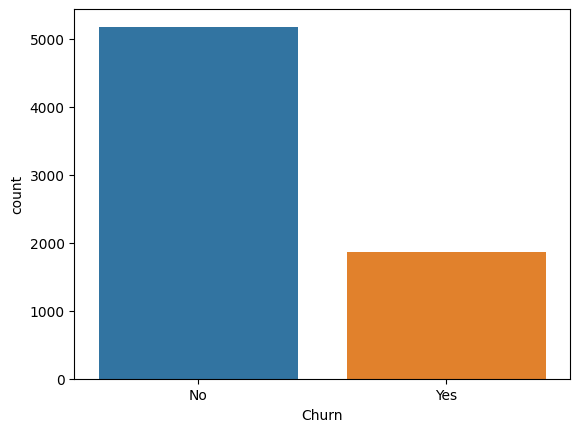

In [11]:
sns.countplot(x=records['Churn'])

In [12]:
cats=['gender','SeniorCitizen', 'Dependents', 'PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
for i in cats:
   print(i, ':\n')
   print(records[i].value_counts())
   print('\n')
   

gender :

Male      3555
Female    3488
Name: gender, dtype: int64


SeniorCitizen :

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


Dependents :

No     4933
Yes    2110
Name: Dependents, dtype: int64


PhoneService :

Yes    6361
No      682
Name: PhoneService, dtype: int64


MultipleLines :

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


InternetService :

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


OnlineSecurity :

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


OnlineBackup :

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


DeviceProtection :

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


TechSupport :

No                     3473
Yes    

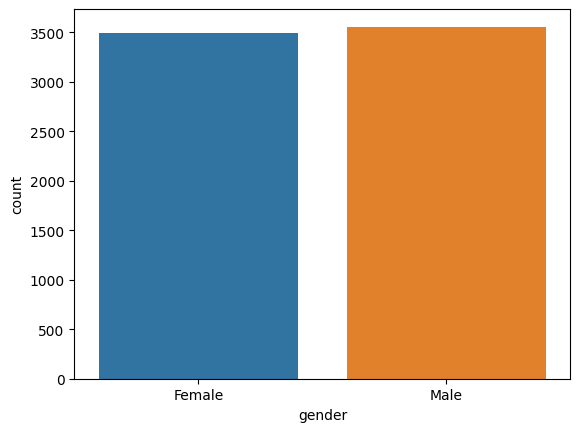

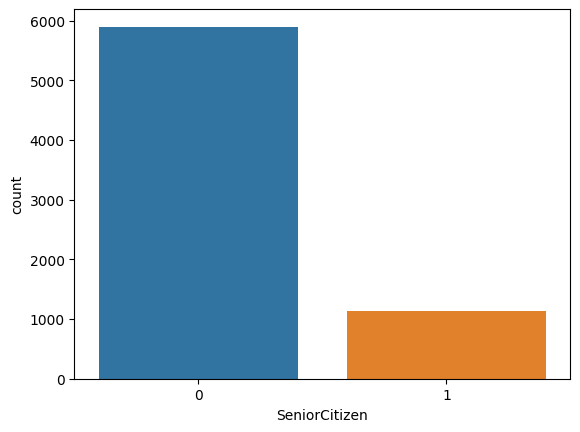

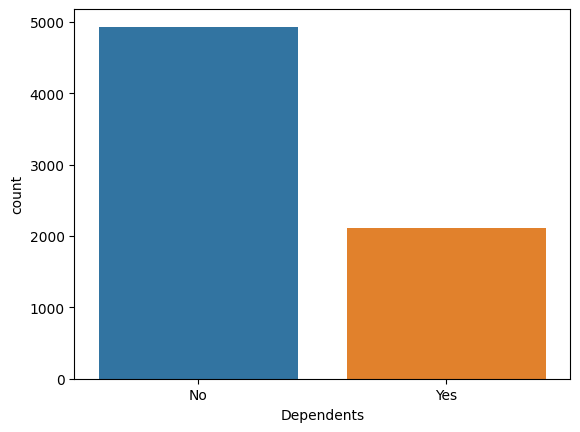

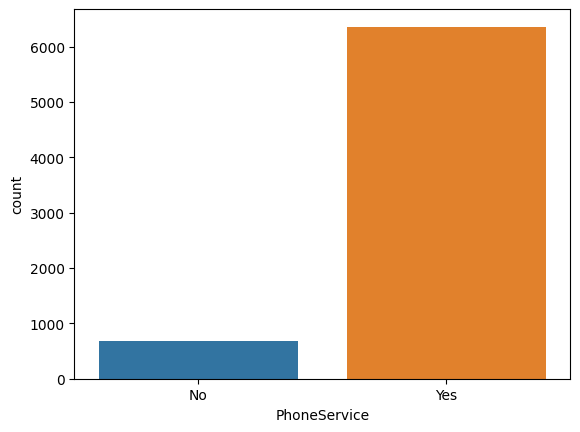

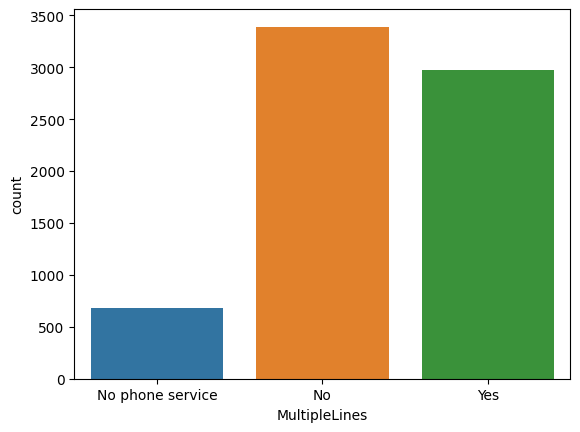

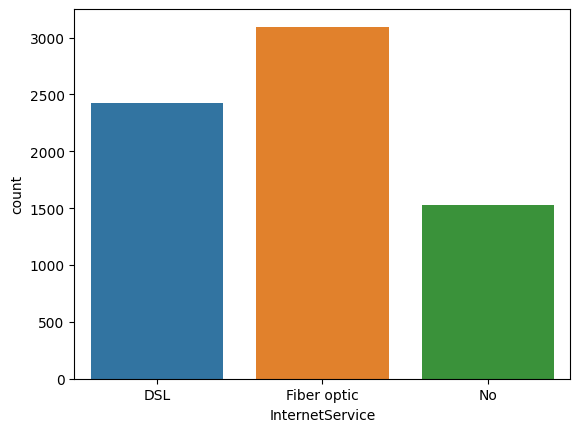

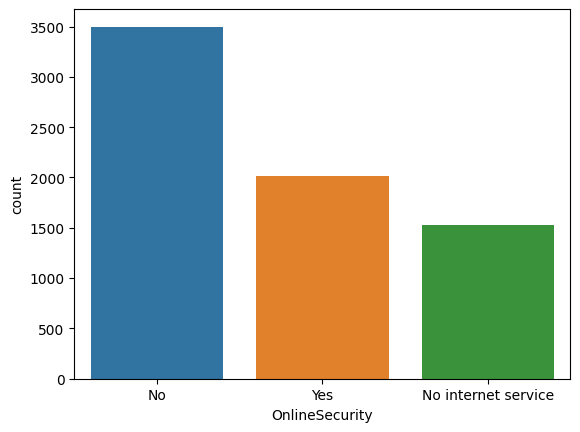

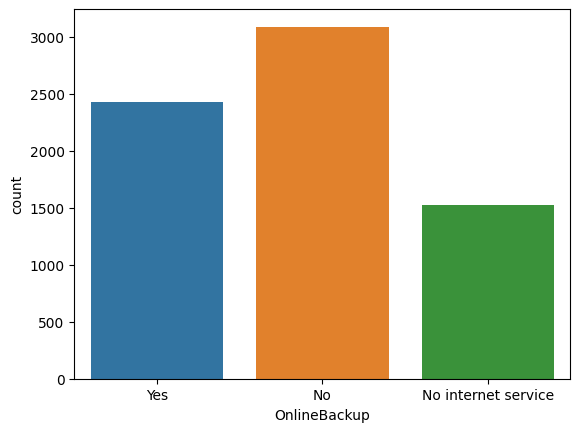

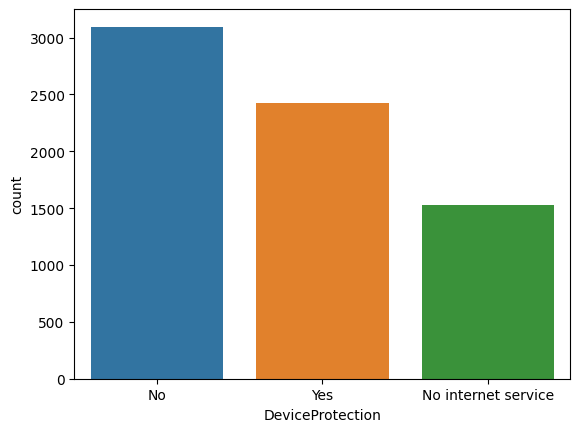

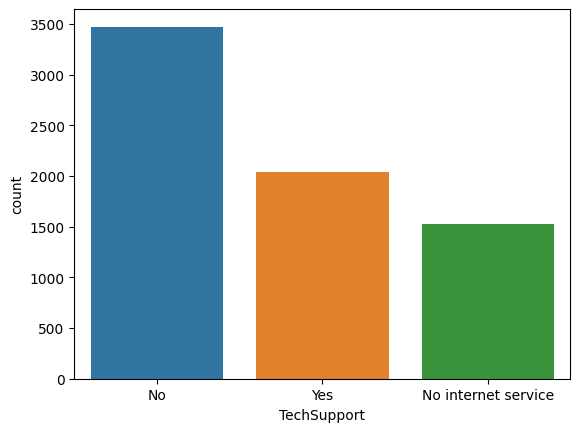

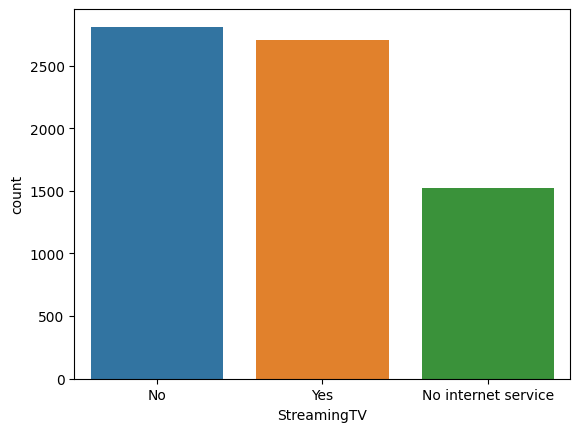

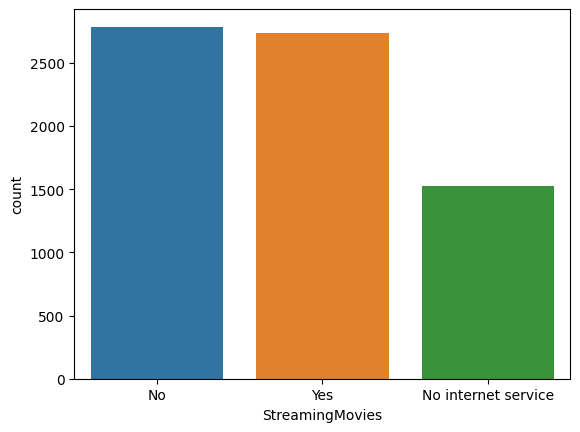

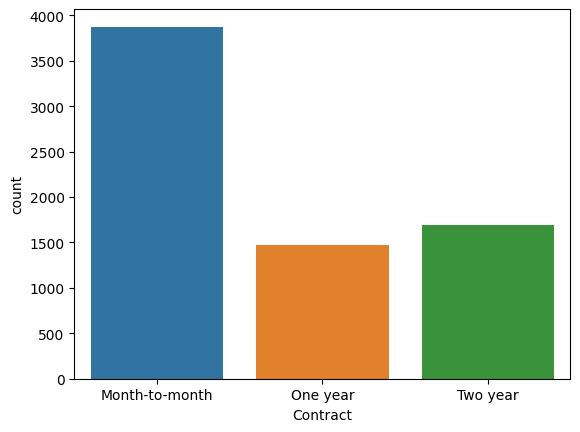

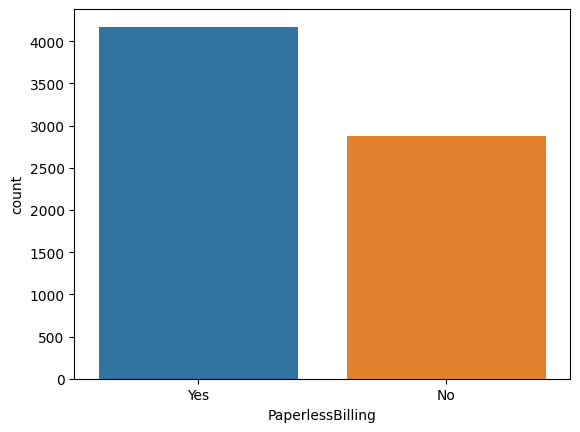

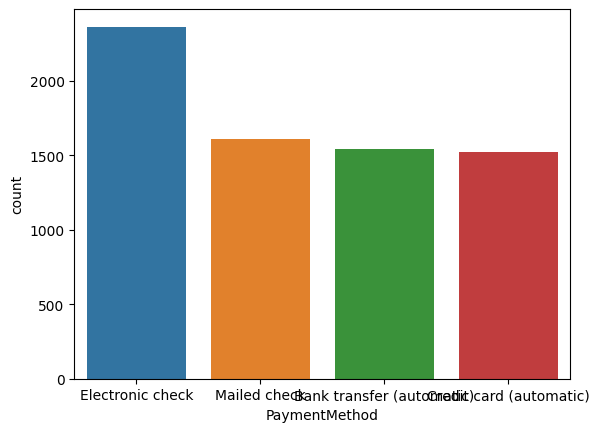

In [13]:
for i in cats:
   plt.figure()
   sns.countplot(x=records[i])

In [14]:
nums=['tenure', 'MonthlyCharges', 'TotalCharges']
for i in nums:
   print(i, ':\n')
   print(records[i].describe())
   print('\n')


tenure :

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


MonthlyCharges :

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64


TotalCharges :

count    7043.000000
mean     2281.916928
std      2265.270398
min        18.800000
25%       402.225000
50%      1397.475000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64




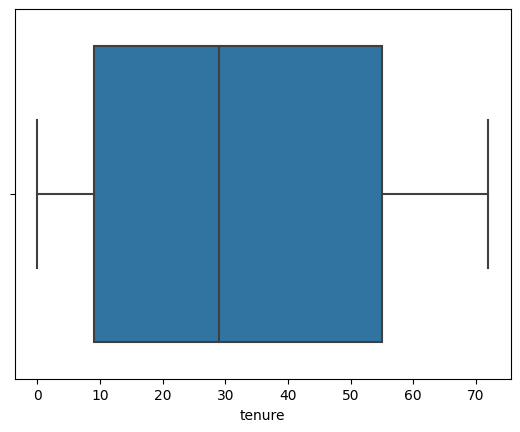

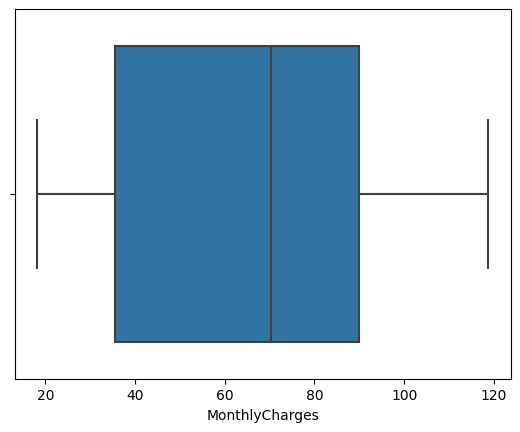

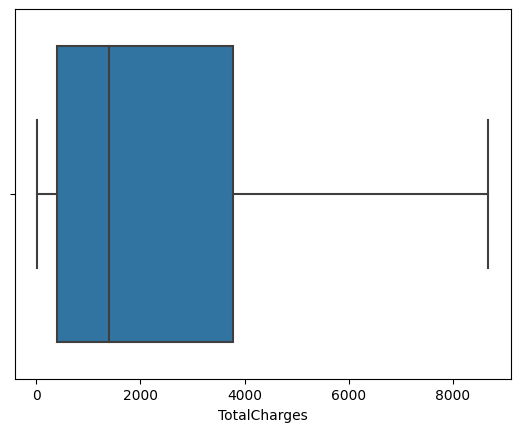

In [15]:
for i in nums:
  plt.figure()
  sns.boxplot(x=records[i])


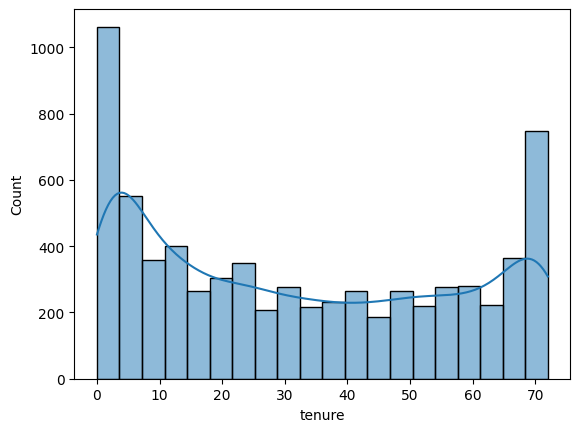

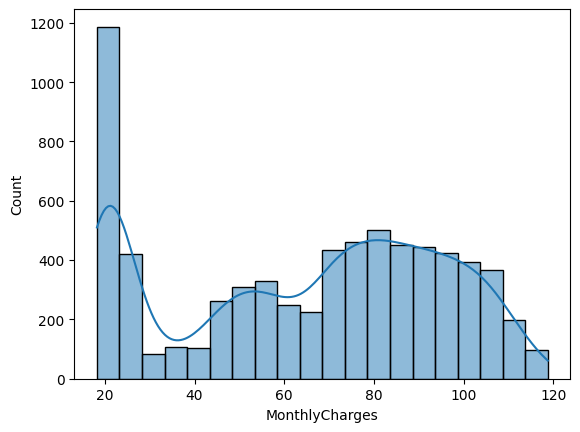

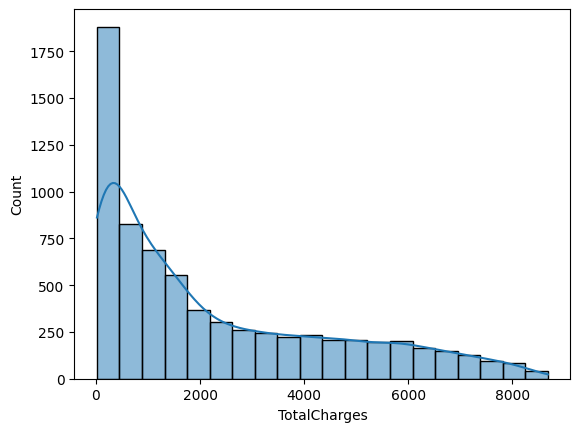

In [16]:
for i in nums:
  plt.figure()    
  sns.histplot(data=records, x=i,  bins=20, kde=True)


Explore relationships

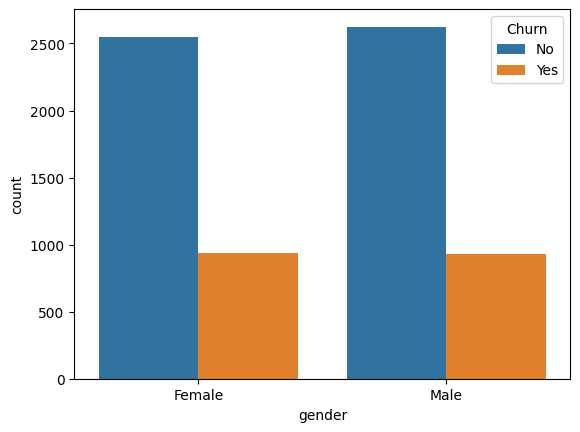

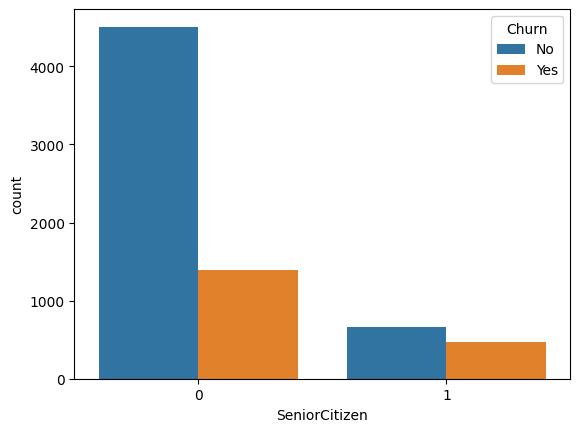

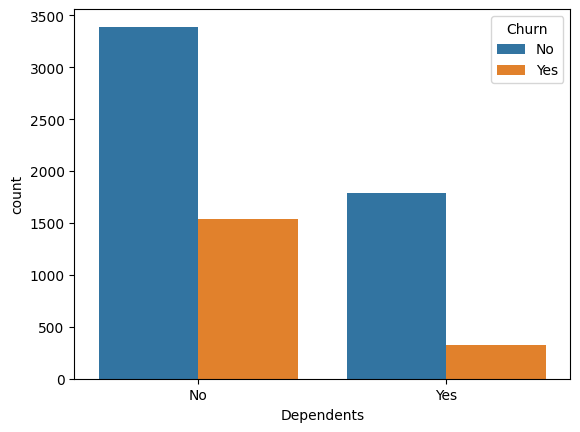

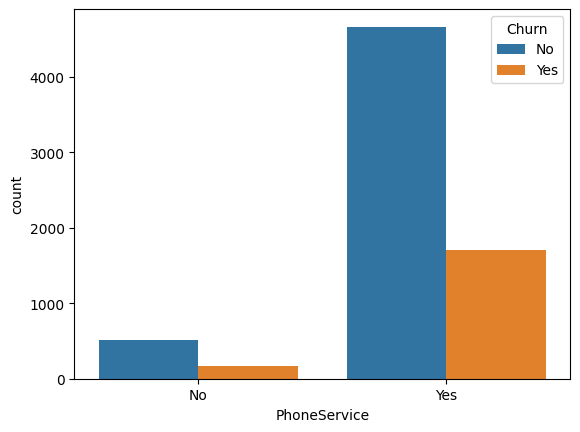

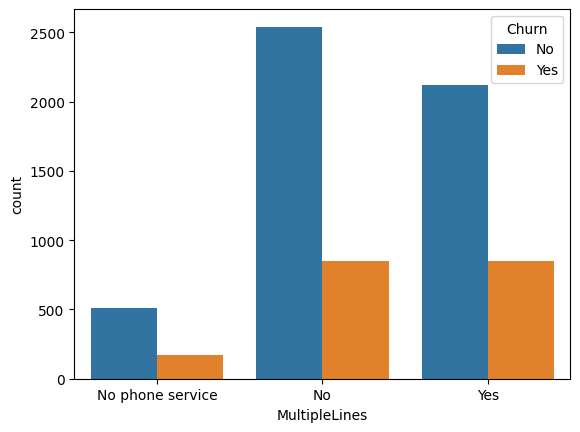

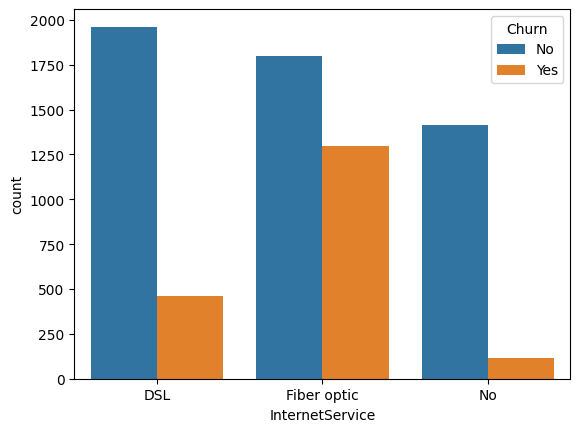

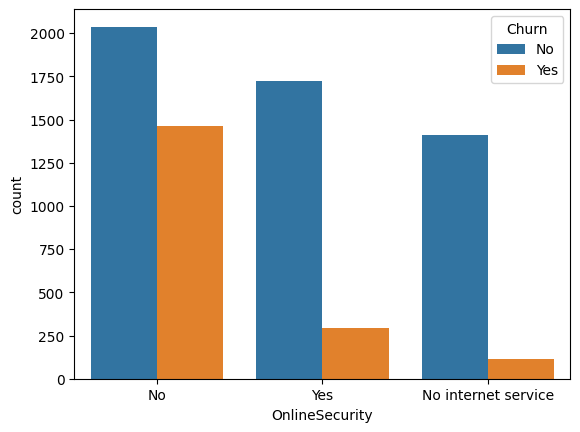

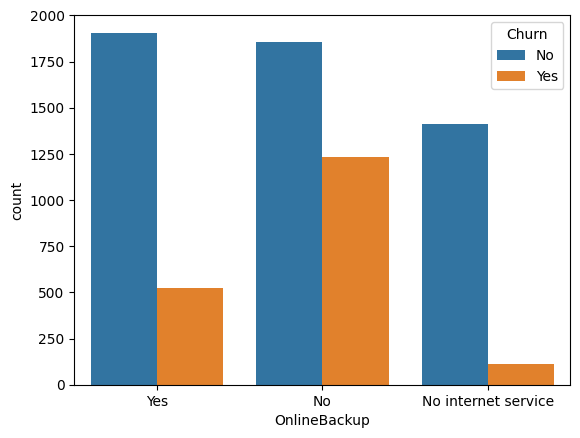

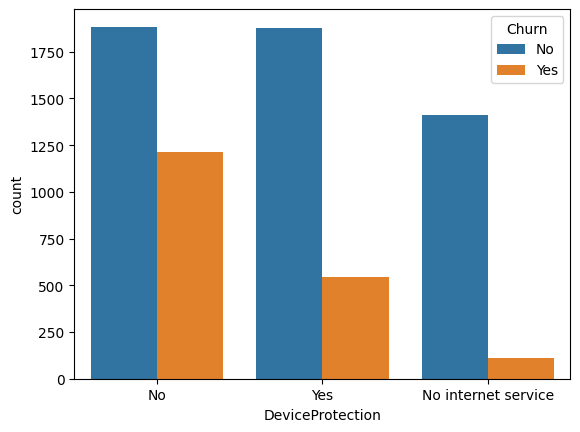

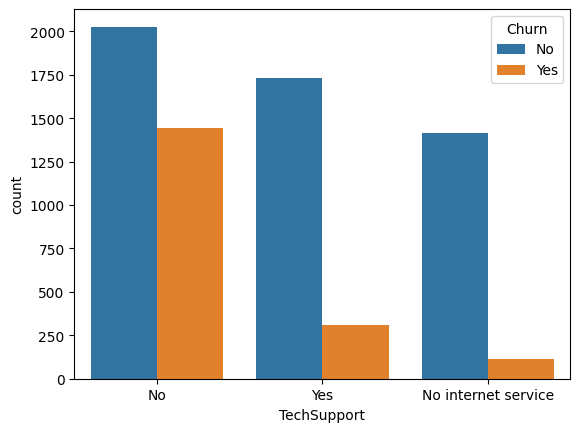

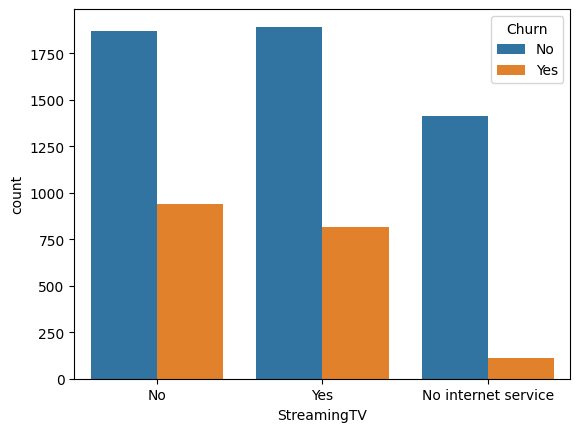

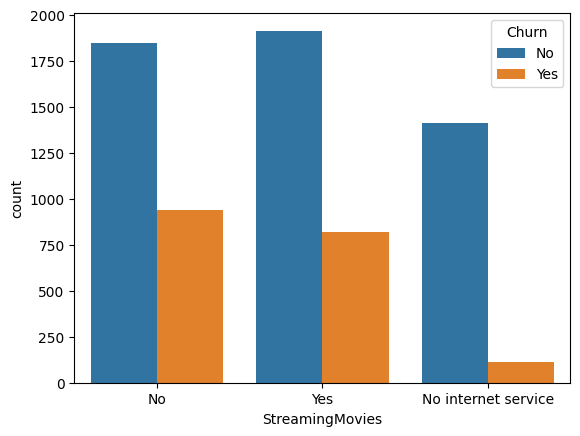

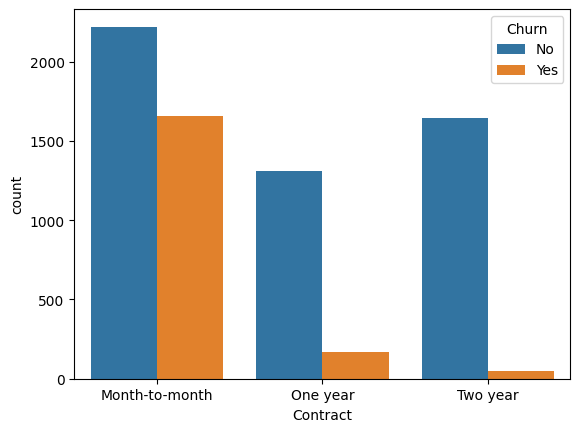

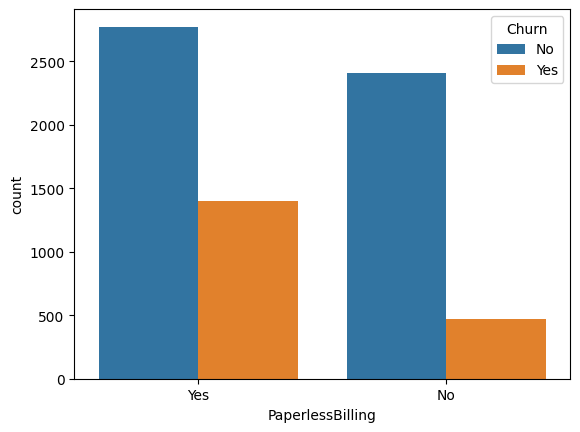

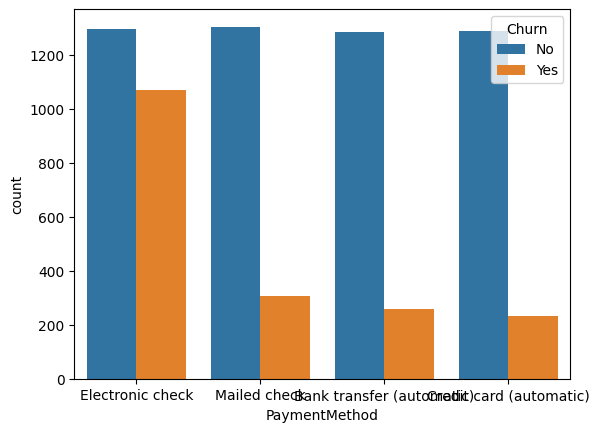

In [17]:
for i in cats:
   plt.figure()
   sns.countplot(x=records[i], hue=records['Churn'])

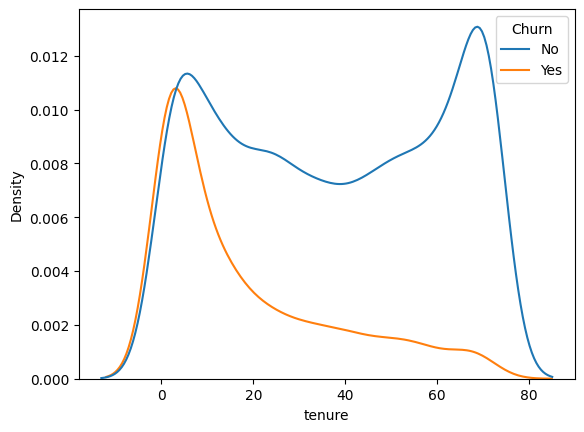

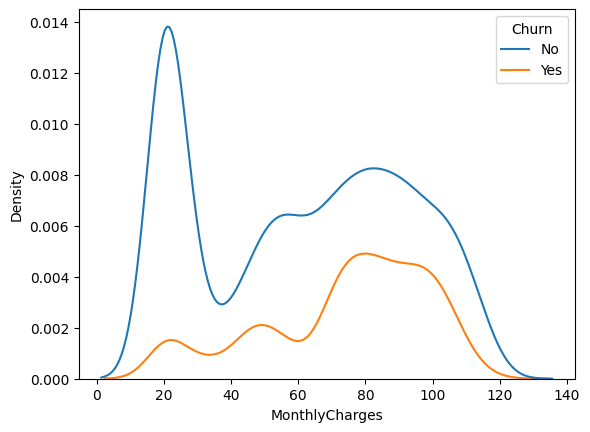

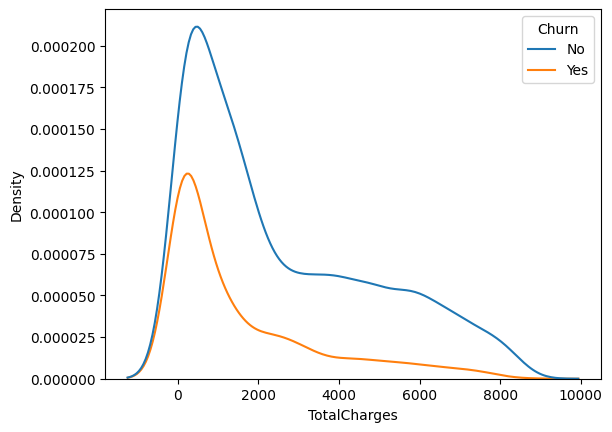

In [18]:
for i in nums:
  plt.figure()    
  sns.kdeplot(data=records, x=i, hue='Churn')

<ipython-input-19-728c3b7c2aac>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(data=records.corr(), annot=True, cmap='crest')


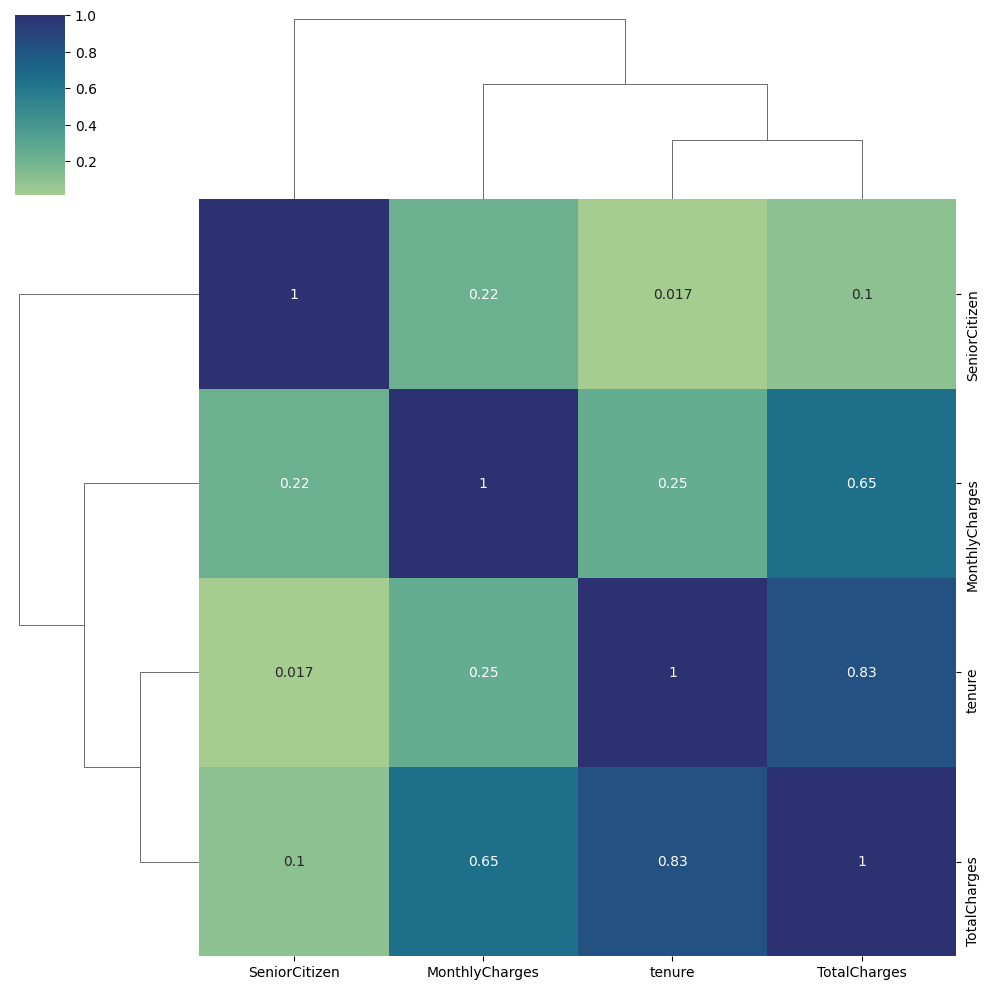

In [19]:
sns.clustermap(data=records.corr(), annot=True, cmap='crest')

<ipython-input-20-551c9746ebff>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(data=records.corr(), cmap="Blues",linewidths=.9, annot=True)


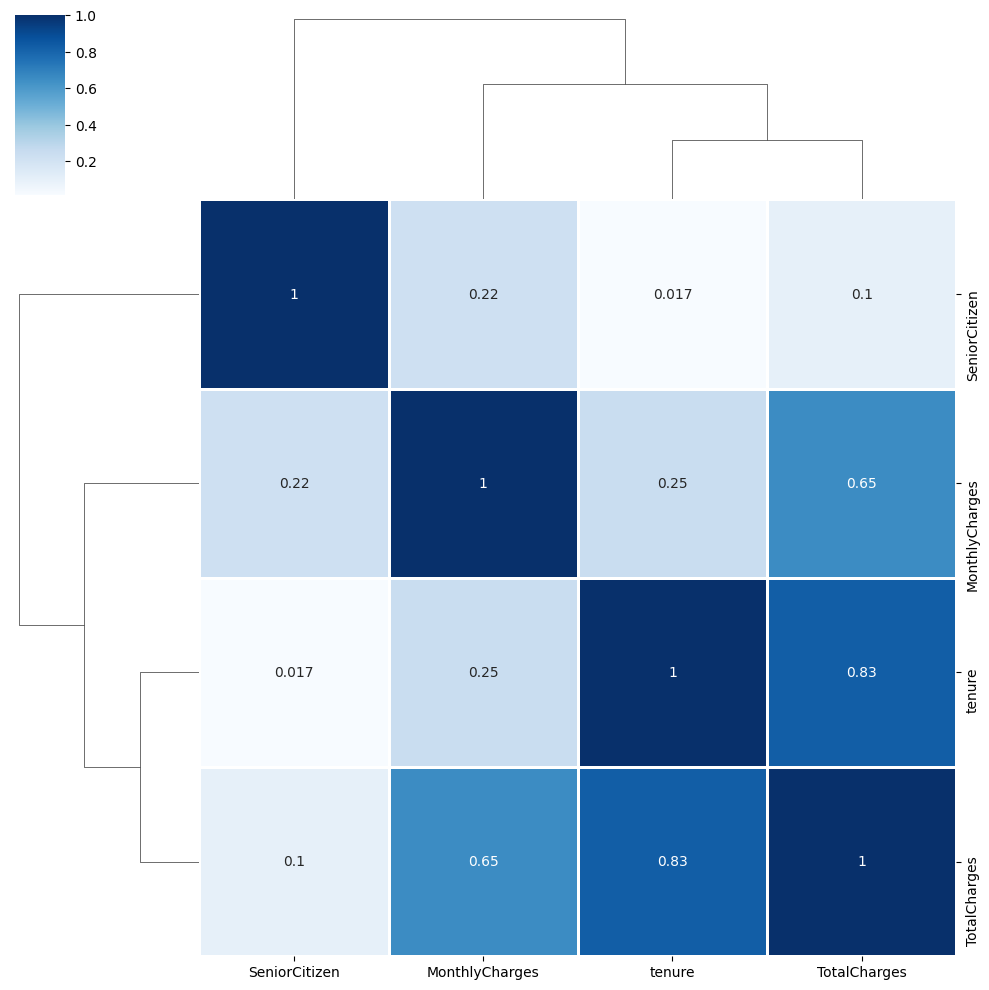

In [20]:
 #visualise clustermap
 sns.clustermap(data=records.corr(), cmap="Blues",linewidths=.9, annot=True)

### **Data preparation**
* Feature selection
* Normalise data

Let's try it simple by selecting two features to we can visually the clusters in a 2D graph for the sake of learning

In [21]:
#Convert categorical variables to numerical using get dummies
records=pd.get_dummies(records, columns=['SeniorCitizen'], drop_first=True)

print(records.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   Partner           7043 non-null   object 
 2   Dependents        7043 non-null   object 
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   object 
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


In [22]:
# Select relevant features for clustering
features=['MonthlyCharges', 'tenure'] # you can add more eg 'SeniorCitizen_1'
X = records[features]

In [23]:
#import scaler
from sklearn.preprocessing import StandardScaler

In [24]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
X_norm=scaler.fit_transform(X)

In [25]:
# Alternatively, standardize the features
#X = (X - X.mean()) / X.std()

## **2.3. K-Means clustering**

### **Model building**

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [27]:
# Fit K-means clustering model with optimal number of clusters
k=3
kmeans = KMeans(n_clusters=k, n_init='auto',max_iter=300, random_state=2023)
kmeans.fit(X_norm)

# Add cluster labels to original dataset
records['Cluster'] = kmeans.labels_

### **EDA with clusters**

In [28]:
records['Cluster'].value_counts()

2    3184
0    2411
1    1448
Name: Cluster, dtype: int64

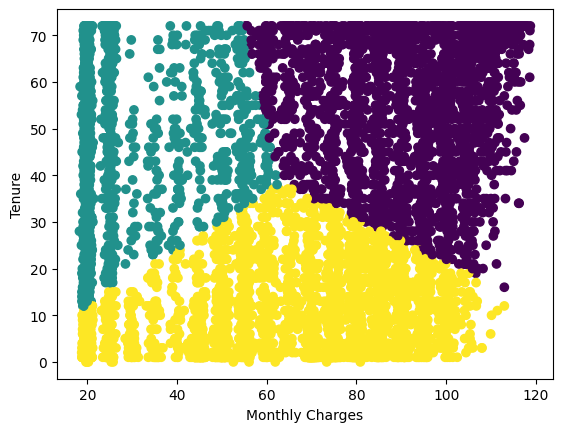

In [29]:
# Visualize the clusters
plt.scatter(X['MonthlyCharges'], X['tenure'], c=kmeans.labels_)
plt.xlabel("Monthly Charges")
plt.ylabel("Tenure")
plt.show()

In [30]:
#Print sample rows for selected columns to see the clusters
records[['tenure','MonthlyCharges','Cluster']].sample(10)

,tenure,MonthlyCharges,Cluster
2445,27,74.40,2
3325,4,85.65,2
5416,57,95.00,0
5147,28,30.10,1
4521,46,45.55,1
6302,5,75.55,2
4032,68,84.65,0
4884,41,94.90,0
6883,34,105.35,0
5865,3,20.85,2


<Axes: xlabel='MonthlyCharges', ylabel='Density'>

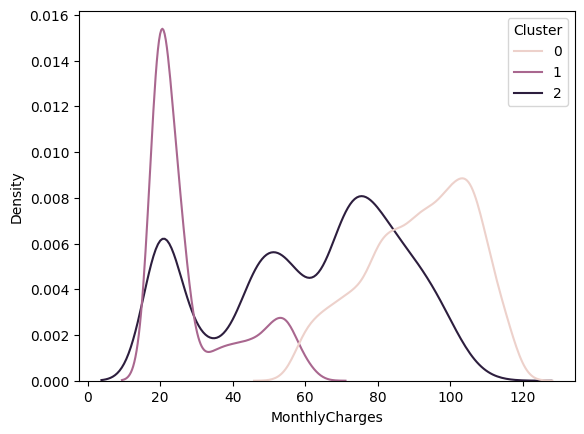

In [31]:
sns.kdeplot(data=records, x='MonthlyCharges', hue='Cluster')

<Axes: xlabel='tenure', ylabel='Density'>

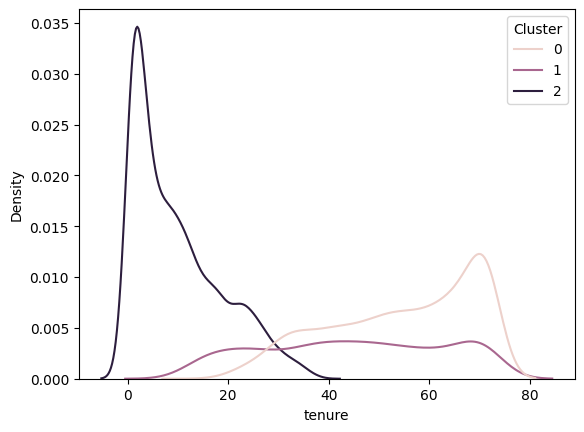

In [32]:
sns.kdeplot(data=records, x='tenure', hue='Cluster')

In [33]:
records.groupby('Cluster')['tenure'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,2411.0,54.723766,14.374165,16.0,43.0,57.0,68.0,72.0
1,1448.0,44.747928,17.831024,12.0,30.0,45.0,60.0,72.0
2,3184.0,9.816583,8.743327,0.0,2.0,7.0,15.0,37.0


In [34]:
records.groupby('Cluster')['MonthlyCharges'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,2411.0,91.313210,14.910280,55.30,80.4500,93.550,104.00,118.75
1,1448.0,28.797652,12.585140,18.25,19.9000,23.350,35.45,62.30
2,3184.0,61.011762,25.026461,18.75,44.6375,66.675,80.35,112.95


### **Optional task**

Repeat the above steps but select SeniorCitizen_1 as well, you will see how we may 'treat' people based on their SeniorCitizen status!

<Axes: xlabel='SeniorCitizen_1', ylabel='count'>

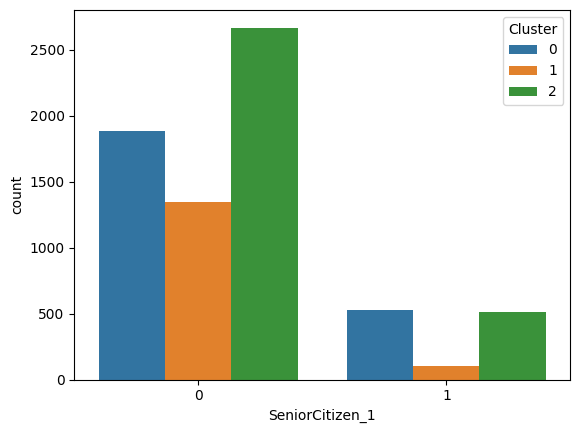

In [35]:
sns.countplot(x=records['SeniorCitizen_1'], hue=records['Cluster'])

**End optional task**

## **2.4. Performance Evaluation**
* Within-Cluster Sum of Squares
* Silhouette score


###**Within-Cluster Sum of Squares**
Within-Cluster Sum of Squares (WCSS) is the sum of the squared distance between each data point and its assigned cluster center, averaged over all the clusters.

WCSS measures the compactness of the clusters, with lower values indicating tighter and more compact clusters. 

In [36]:
# Evaluate the model using within-cluster sum of squares (WCSS)
wcss = kmeans.inertia_
print("Within-Cluster Sum of Squares (WCSS):", '%.3f' % wcss)


Within-Cluster Sum of Squares (WCSS): 5039.339


### **Silhouette score**

measures how well-separated the clusters are, and how similar the data points are within each cluster.

* The silhouette score ranges from -1 to 1. 
* A score of 1 means that the data points within a cluster are very similar to each other, and very different from the data points in other clusters. 
* A score of 0 means that the data points are equally similar to neighboring clusters. 
* A score of -1 means that the data points may have been assigned to the wrong cluster.

In [37]:
# Compute the Silhouette score for the clustering model
silhouette_avg = silhouette_score(X_norm, kmeans.labels_)

print('Silhouette score:', '%.3f' % silhouette_avg)

Silhouette score: 0.420


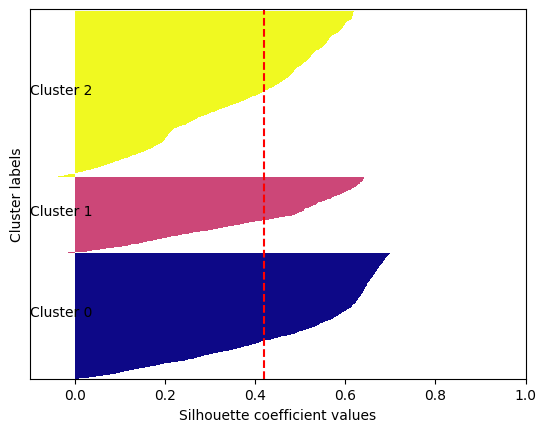

In [38]:
#Import funtions to visualise silhouette score
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib.cm as cm

cluster_labels = kmeans.fit_predict(X_norm)

# Compute silhouette scores
silhouette_avg = silhouette_score(X_norm, cluster_labels)
sample_silhouette_values = silhouette_samples(X_norm, cluster_labels)

# Plot silhouette diagram
n_clusters = 3
fig, ax = plt.subplots()
y_lower, y_upper = 0, 0

# Define the colormap, options include: autumn, Spectral, viridis, plasma, cool, jet
cmap = cm.plasma 

# Create a list of evenly spaced values in the range [0, 1]
values = np.linspace(0, 1, n_clusters)

for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper += size_cluster_i
    color = cmap(values[i])
    ax.barh(range(y_lower, y_upper), ith_cluster_silhouette_values, height=1.0, 
            edgecolor='none', color=color)
    ax.text(-0.1, (y_lower + y_upper) / 2, 'Cluster ' + str(i), color='black', fontsize=10)
    y_lower += size_cluster_i

ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster labels")
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
ax.set_ylim([0, len(X_norm) + (n_clusters + 1) * 10])

plt.show()

## **2.5. Optimising k**


### **Use the elbow method based on the SSE score**

In [39]:
# Determine optimal number of clusters using the SSE metric
sse_scores = []
best_k=3
best_sse_score=4622.613
for k in range(2, 41):
  kmeans = KMeans(n_clusters=k, n_init=2)
  kmeans.fit(X_norm)
  sse_score_k=kmeans.inertia_
  sse_scores.append(sse_score_k)
  if best_sse_score > sse_score_k:
    best_k = k
    best_sse_score = sse_score_k

print('Best k: ', best_k)
print('Best within cluster sum of squarred error score: ', '%.3f' %best_sse_score)

Best k:  40
Best within cluster sum of squarred error score:  221.552


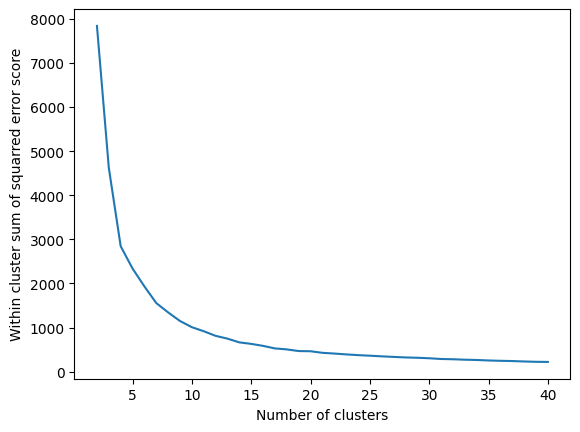

In [40]:
# Plot the silhouette scores to determine optimal number of clusters
plt.plot(range(2,41), sse_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Within cluster sum of squarred error score")
plt.show()

### **Use the elbow method based on the silhouette score**

In [41]:
# Determine optimal number of clusters using silhouette score
sil_scores = []
best_k=2
best_sil_score=0
for k in range(2, 41):
  kmeans = KMeans(n_clusters=k, n_init=2)
  kmeans.fit(X_norm)
  sil_score_k=silhouette_score(X_norm, kmeans.labels_)
  sil_scores.append(sil_score_k)
  if best_sil_score < sil_score_k:
    best_k = k
    best_sil_score = sil_score_k

print('Best k: ', best_k)
print('Best silhouette score: ', '%.3f' %best_sil_score)

Best k:  4
Best silhouette score:  0.476


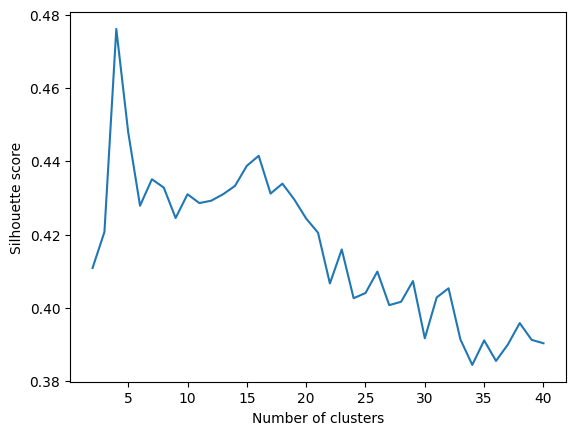

In [42]:
# Plot the silhouette scores to determine optimal number of clusters
plt.plot(range(2,41), sil_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()



Within-Cluster Sum of Squares (WCSS): 2845.3811956555974


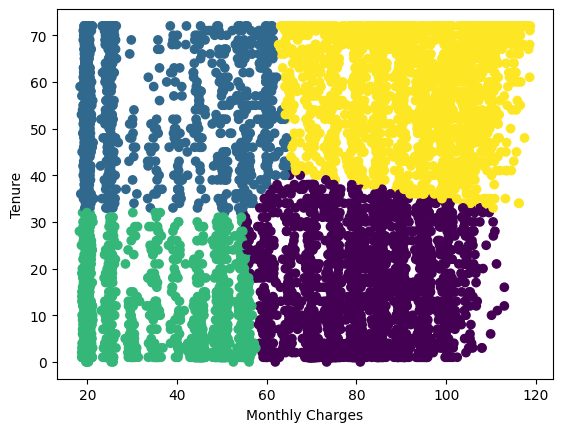

In [43]:
# Fit K-means clustering model with optimal number of clusters
kmeans = KMeans(n_clusters=4,n_init='auto', random_state=2023)
kmeans.fit(X_norm)

# Add cluster labels to original dataset
records['Cluster'] = kmeans.labels_

# Evaluate the model using within-cluster sum of squares (WCSS)
wcss = kmeans.inertia_
print("Within-Cluster Sum of Squares (WCSS):", wcss)

# Visualize the clusters
plt.scatter(X['MonthlyCharges'], X['tenure'], c=kmeans.labels_)
plt.xlabel("Monthly Charges")
plt.ylabel("Tenure")
plt.show()

In [44]:
records.head(10)

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,SeniorCitizen_1,Cluster
0,Female,Yes,No,1,No,No phone service,DSL,No,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,2
1,Male,No,No,34,Yes,No,DSL,Yes,No,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,0,1
2,Male,No,No,2,Yes,No,DSL,Yes,Yes,No,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,2
3,Male,No,No,45,No,No phone service,DSL,Yes,No,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,1
4,Female,No,No,2,Yes,No,Fiber optic,No,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,0
5,Female,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,0,0
6,Male,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,...,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,0,0
7,Female,No,No,10,No,No phone service,DSL,Yes,No,No,...,No,No,Month-to-month,No,Mailed check,29.75,301.90,No,0,2
8,Female,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,0,0
9,Male,No,Yes,62,Yes,No,DSL,Yes,Yes,No,...,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,0,1


Let's create the silhouette plot

In [45]:
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib.cm as cm

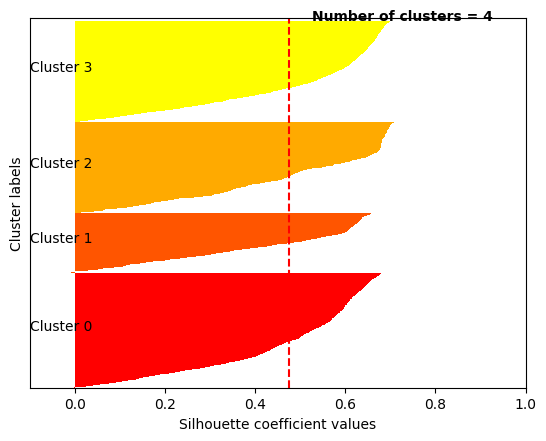

In [46]:
# Set the number of clusters
n_clusters = 4

# Fit K-means clustering model
kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=2023)
cluster_labels = kmeans.fit_predict(X_norm)

# Compute silhouette scores
silhouette_avg = silhouette_score(X_norm, cluster_labels)
sample_silhouette_values = silhouette_samples(X_norm, cluster_labels)

# Define the colormap, options include: autumn, Spectral, viridis, plasma, cool, jet
cmap = cm.autumn 

# Create a list of evenly spaced values in the range [0, 1]
values = np.linspace(0, 1, n_clusters)

# Plot silhouette diagram
fig, ax = plt.subplots()
y_lower, y_upper = 0, 0
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper += size_cluster_i
    color = cmap(values[i])
    ax.barh(range(y_lower, y_upper), ith_cluster_silhouette_values, height=1.0, 
            edgecolor='none', color=color)
    ax.text(-0.1, (y_lower + y_upper) / 2, 'Cluster ' + str(i), color='black', fontsize=10)
    y_lower += size_cluster_i

ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster labels")
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
ax.set_ylim([0, len(X_norm) + (n_clusters + 1) * 10])

ax.text(silhouette_avg + 0.05, len(X_norm) + 5, "Number of clusters = %d" % n_clusters, fontsize=10, fontweight='bold')

plt.show()

As you can see, the evaluation and optimisation are mathematically based, domain expertise is important to make sense if the clusters are meaningful, applicable and ethical. 

## **2.6 Model evaluation on unseen data:**
Split data so we can test the model on unseen data

In [47]:
from sklearn.model_selection import train_test_split # Import train_test_split function

In [48]:
# Split the data into training and test sets
X_train, X_test = train_test_split(X, test_size=0.35, random_state=2023)


In [49]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_norm=scaler.fit_transform(X_train)
X_test_norm=scaler.fit_transform(X_test)

In [50]:
# Determine optimal number of clusters using silhouette score
sil_scores = []
best_k=2
best_sil_score=0
for k in range(2, 21):
  kmeans = KMeans(n_clusters=k, n_init='auto', random_state=2023)
  kmeans.fit(X_train_norm)
  sil_score_k=silhouette_score(X_train_norm, kmeans.labels_)
  sil_scores.append(sil_score_k)
  if best_sil_score < sil_score_k:
    best_k = k
    best_sil_score = sil_score_k

print('Best k: ', best_k)
print('Best silhouette score: ', '%.3f' %best_sil_score)

Best k:  4
Best silhouette score:  0.475


In [51]:
# Fit K-means clustering model with optimal number of clusters
kmeans = KMeans(n_clusters=4, n_init='auto', max_iter=300, random_state=2023)
kmeans.fit(X_train_norm)

KMeans(n_clusters=4, n_init='auto', random_state=2023)

In [52]:
# Predict the clusters for the test data
cluster_pred = kmeans.predict(X_test_norm)

In [53]:
# Evaluate the clustering performance on test data using Silhouette score
silhouette_avg = silhouette_score(X_test_norm, cluster_pred)
print("Silhouette score for K-means clustering:", '%.3f' % silhouette_avg)

Silhouette score for K-means clustering: 0.477


Now that we have Clustered assigned to each data point, we can examine the cluster desriptive stats and visualisation

In [54]:
!pip install hdbscan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import hdbscan


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
data = pd.read_csv(url)

In [56]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)
binary_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_columns:
    data[col] = data[col].map({'Yes': 1, 'No': 0})
data = pd.get_dummies(data, columns=['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'])
data.drop(['customerID'], axis=1, inplace=True)


In [57]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [58]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

In [59]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=15, gen_min_span_tree=True)
cluster_labels = clusterer.fit_predict(reduced_data)

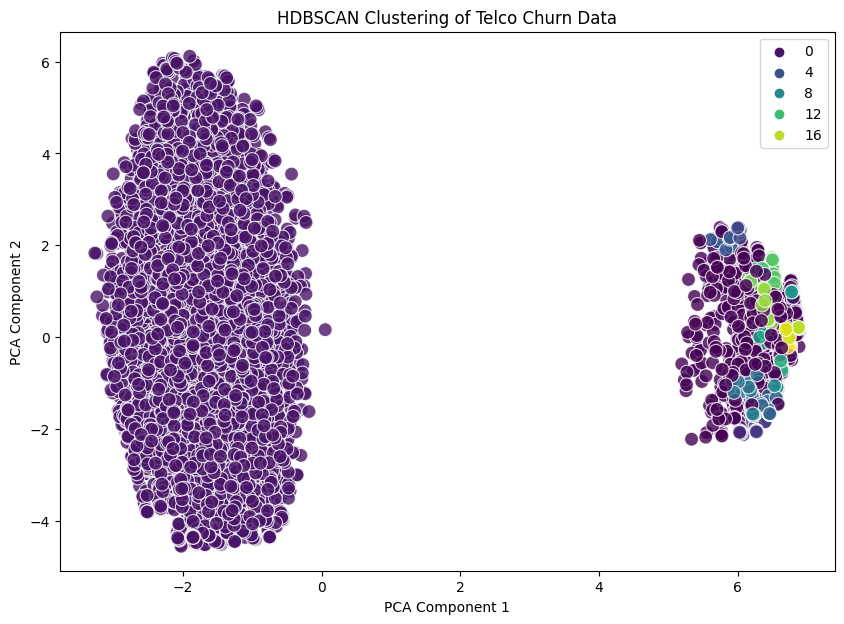

In [60]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=cluster_labels, palette='viridis', s=100, alpha=0.8)
plt.title('HDBSCAN Clustering of Telco Churn Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [61]:
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(scaled_data)

In [62]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=15)
cluster_labels = clusterer.fit_predict(reduced_data)

In [63]:
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

<Axes: ylabel='$\\lambda$ value'>

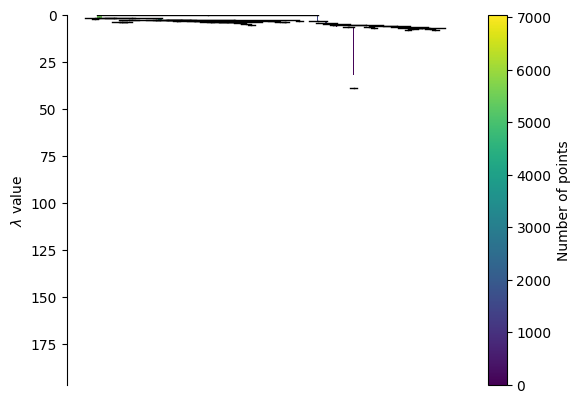

In [64]:
clusterer.condensed_tree_.plot()

<Axes: ylabel='$\\lambda$ value'>

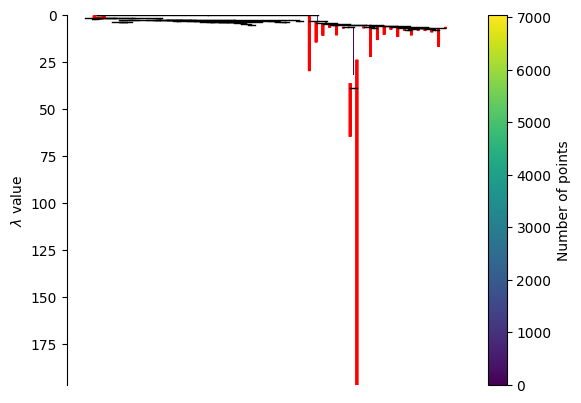

In [65]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

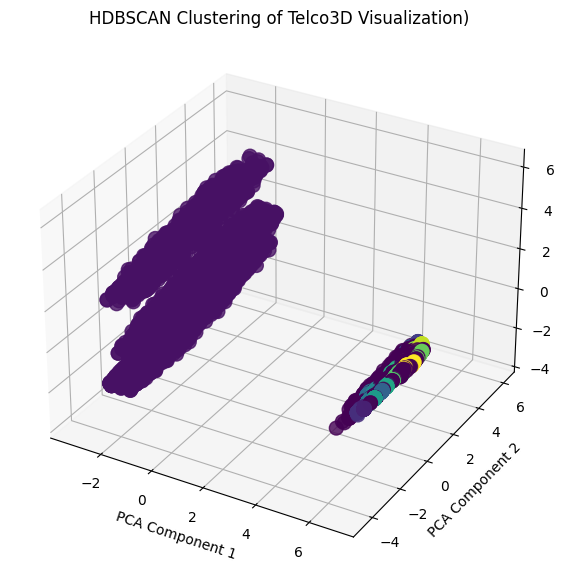

In [66]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], c=cluster_labels, cmap='viridis', s=100, alpha=0.8)

ax.set_title('HDBSCAN Clustering of Telco3D Visualization)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

plt.show()

In [67]:
data['Cluster'] = cluster_labels


In [68]:
cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary)

         SeniorCitizen   Partner  Dependents     tenure  PhoneService  \
Cluster                                                                 
-1            0.049881  0.509501    0.450119  30.701900      1.000000   
 0            0.197571  0.482871    0.265905  32.875657      0.876382   
 1            0.000000  0.000000    0.031250   1.875000      1.000000   
 2            0.052632  0.000000    0.000000   2.421053      1.000000   
 3            0.000000  1.000000    1.000000  69.680000      1.000000   
 4            0.277778  1.000000    0.055556  70.333333      1.000000   
 5            0.000000  0.837209    0.279070  65.069767      1.000000   
 6            0.000000  0.000000    1.000000   4.375000      1.000000   
 7            0.031250  0.281250    0.187500   7.750000      1.000000   
 8            0.025641  0.051282    0.000000   4.487179      1.000000   
 9            0.000000  0.028571    0.000000   6.600000      1.000000   
 10           0.000000  0.000000    0.000000   1.30

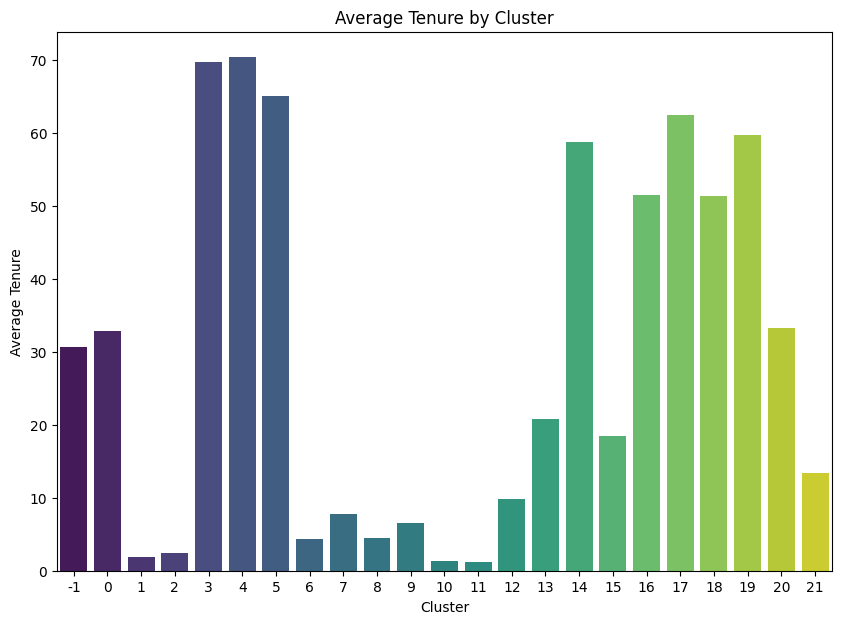

In [69]:
plt.figure(figsize=(10, 7))
sns.barplot(x=cluster_summary.index, y=cluster_summary['tenure'], palette='viridis')
plt.title('Average Tenure by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Tenure')
plt.show()

<Figure size 1000x700 with 0 Axes>

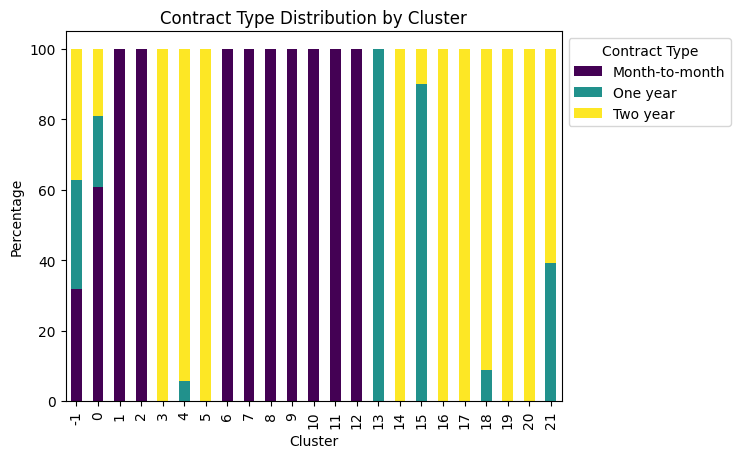

In [70]:
# Convert one-hot encoded Contract columns back to categorical
contract_columns = ['Contract_Month-to-month', 'Contract_One year', 'Contract_Two year']
data['Contract_Type'] = data[contract_columns].idxmax(axis=1).str.replace('Contract_', '')

# Create a crosstab of Contract_Type and Cluster
contract = pd.crosstab(data['Cluster'], data['Contract_Type'])

# Normalize the crosstab to show percentages
contract_percentages = contract.div(contract.sum(axis=1), axis=0) * 100

# Create a stacked bar plot
plt.figure(figsize=(10, 7))
contract_percentages.plot(kind='bar', stacked=True, colormap='viridis', legend=True)
plt.title('Contract Type Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.legend(title='Contract Type', bbox_to_anchor=(1.0, 1.0))
plt.show()

# **3. Case Two: Insurance Premium Estimation**

**KNN regression**

https://www.kaggle.com/datasets/mirichoi0218/insurance 

**Context**
Machine Learning with R by Brett Lantz is a book that provides an introduction to machine learning using R. As far as I can tell, Packt Publishing does not make its datasets available online unless you buy the book and create a user account which can be a problem if you are checking the book out from the library or borrowing the book from a friend. All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book.

Content - Columns

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

**Acknowledgements**
The dataset is available on GitHub here.

**Inspiration**
Can you accurately predict insurance costs?

## **3.1 Loading data**

In [ ]:
url='https://raw.githubusercontent.com/VanLan0/MIS710/main/insurance.csv'


In [ ]:
#loading data
records = pd.read_csv(url)

records.head()

,age,sex,bmi,dependants,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## **3.2. Data Preparation, Exploration and Visualisation**

### **Data cleansing**

* Inspect columns and correct data types
* Detecting and handling missing data


In [ ]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   int64  
 1   sex         1338 non-null   object 
 2   bmi         1338 non-null   float64
 3   dependants  1338 non-null   int64  
 4   smoker      1338 non-null   object 
 5   region      1338 non-null   object 
 6   charges     1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#Inspect missing data
print(records.isnull().sum())

age           0
sex           0
bmi           0
dependants    0
smoker        0
region        0
charges       0
dtype: int64


### **EDA**

* Analyse and visualise each variable
* Any strong correlation from the dataset?  
* How to deal with categorical features? 

In [ ]:
records.describe()

,age,bmi,dependants,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


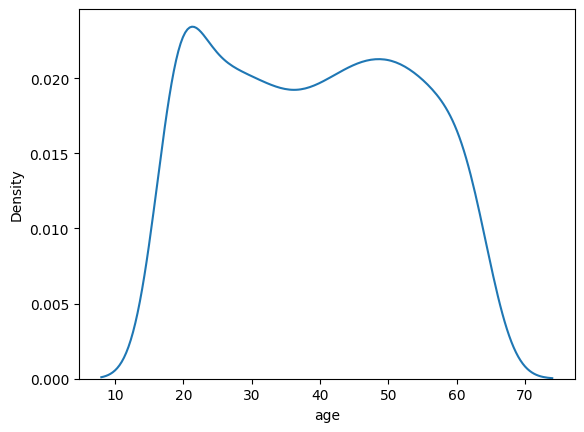

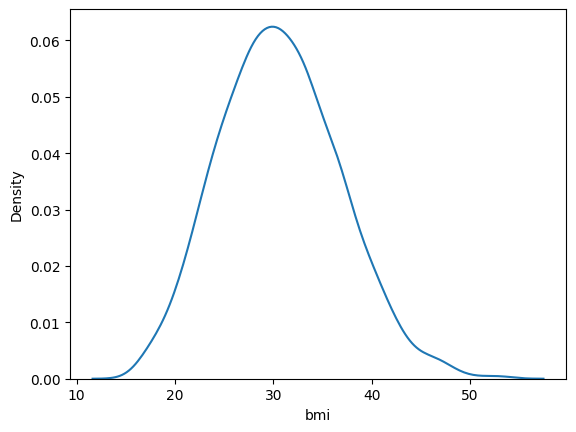

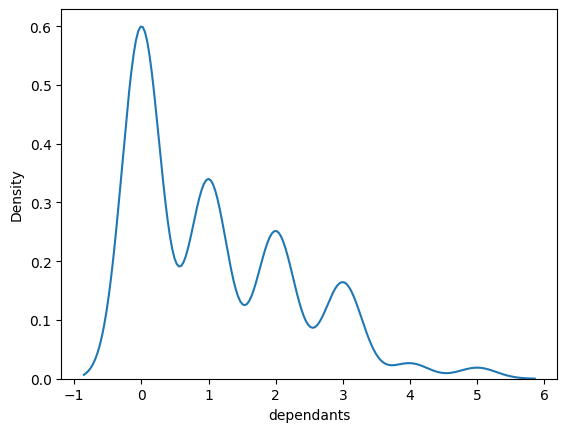

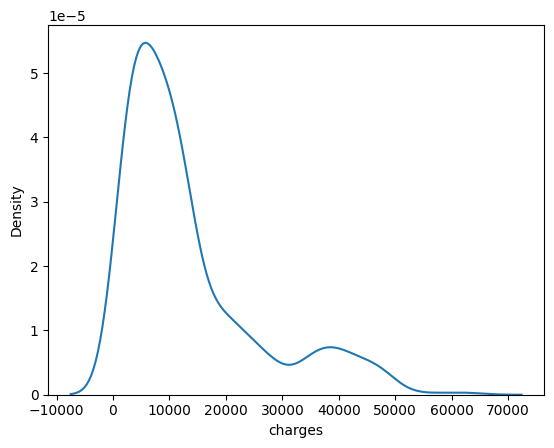

In [ ]:
nums=['age','bmi', 'dependants', 'charges']
for i in nums:
  plt.figure()
  sns.kdeplot(data=records, x=i)

<Figure size 640x480 with 0 Axes>

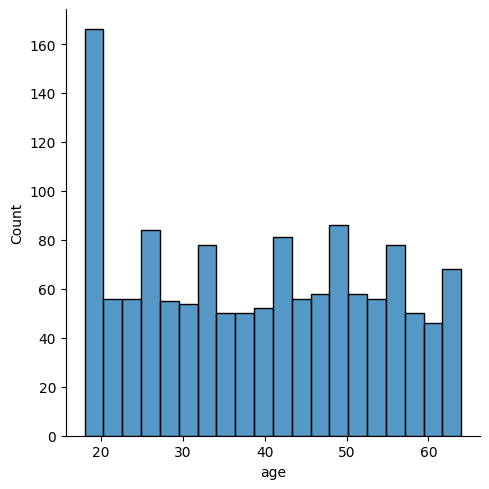

<Figure size 640x480 with 0 Axes>

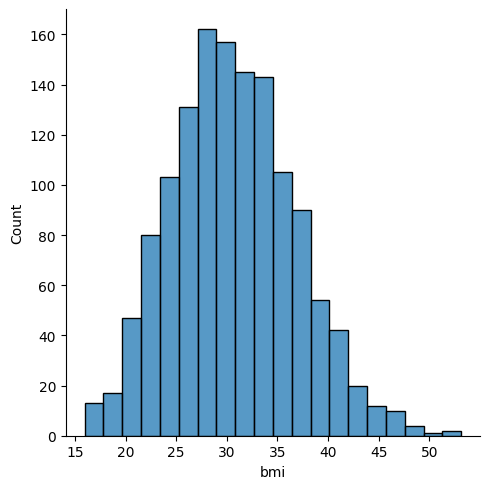

<Figure size 640x480 with 0 Axes>

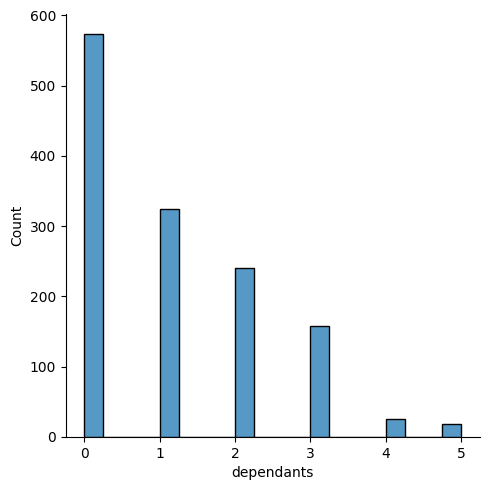

<Figure size 640x480 with 0 Axes>

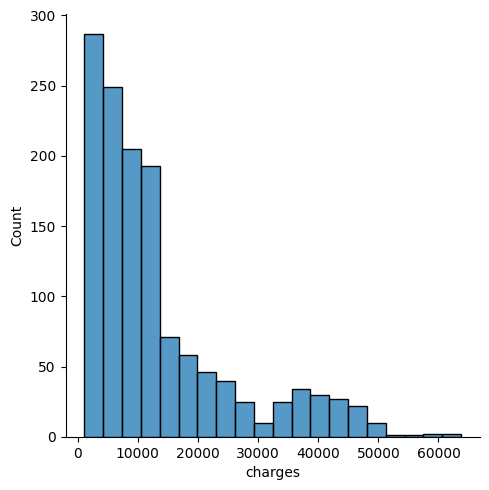

In [ ]:
for i in nums:
  plt.figure()
  sns.displot(data=records, x=i, bins=20)

In [ ]:
cats=['sex','smoker', 'region', 'dependants']
for i in cats:
   print(i, ':\n')
   print(records[i].value_counts())
   print('\n')

sex :

male      676
female    662
Name: sex, dtype: int64


smoker :

no     1064
yes     274
Name: smoker, dtype: int64


region :

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


dependants :

0    574
1    324
2    240
3    157
4     25
5     18
Name: dependants, dtype: int64




sex :

smoker :

region :

dependants :



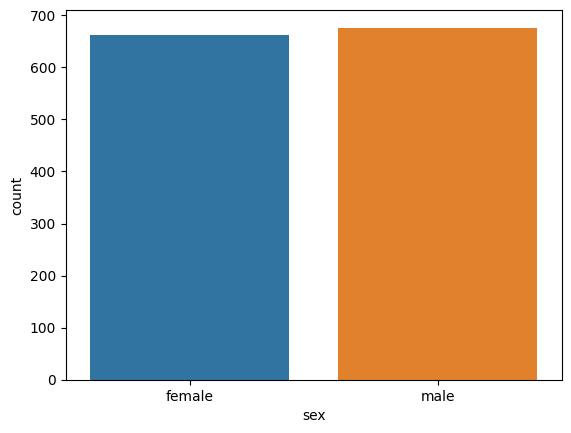

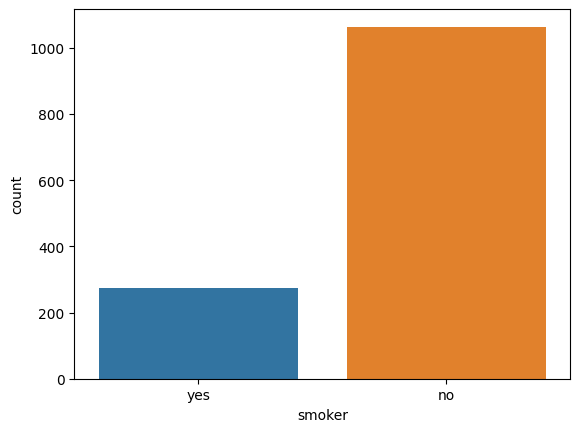

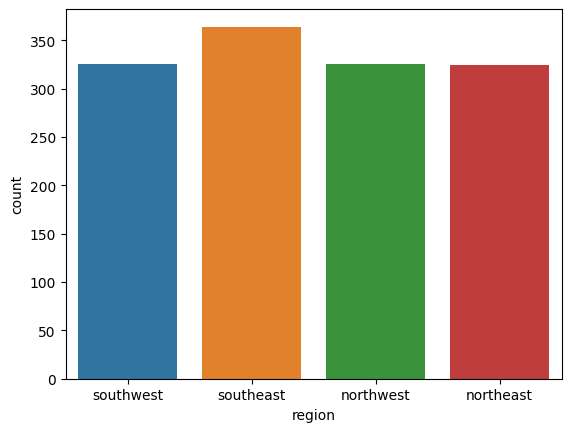

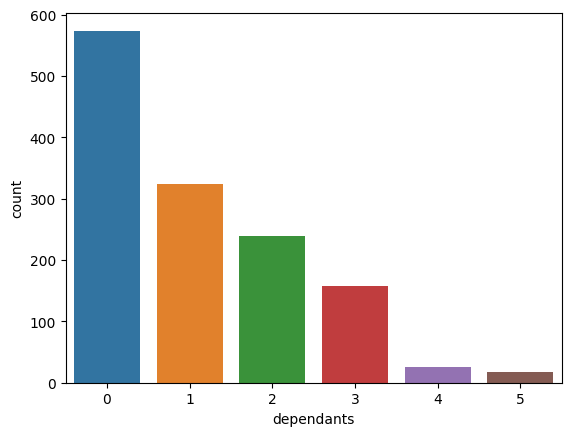

In [ ]:
for i in cats:
   print(i, ':\n')
   plt.figure()
   sns.countplot(data=records, x=i)

<Axes: xlabel='age', ylabel='Density'>

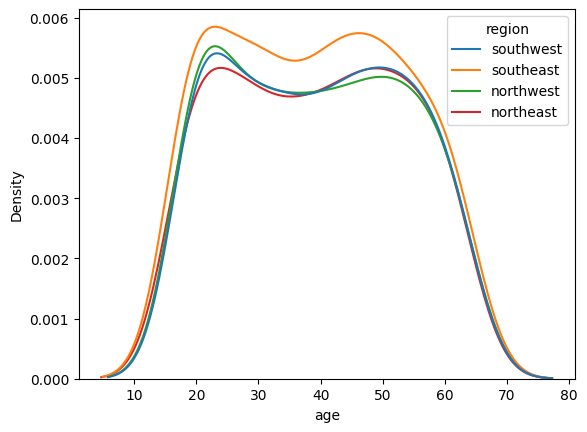

In [ ]:
sns.kdeplot(data=records, x='age', hue='region')

<Axes: xlabel='charges', ylabel='Density'>

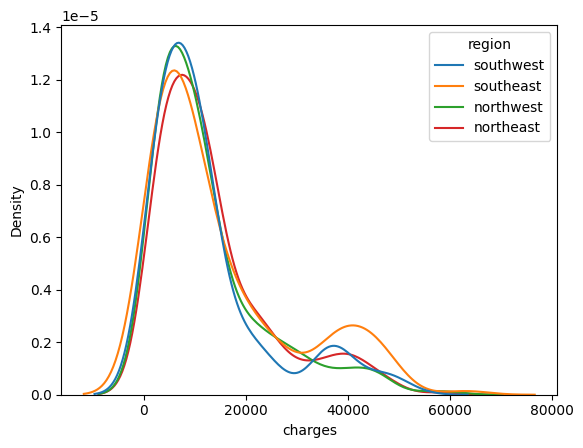

In [ ]:
sns.kdeplot(data=records, x='charges', hue='region')

<AxesSubplot:xlabel='charges', ylabel='Density'>

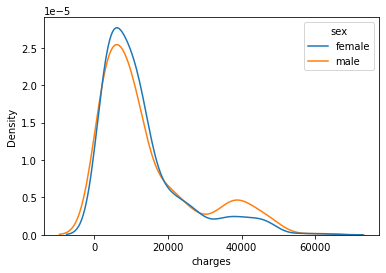

In [ ]:
sns.kdeplot(data=records, x='charges', hue='sex')

<Axes: xlabel='age', ylabel='charges'>

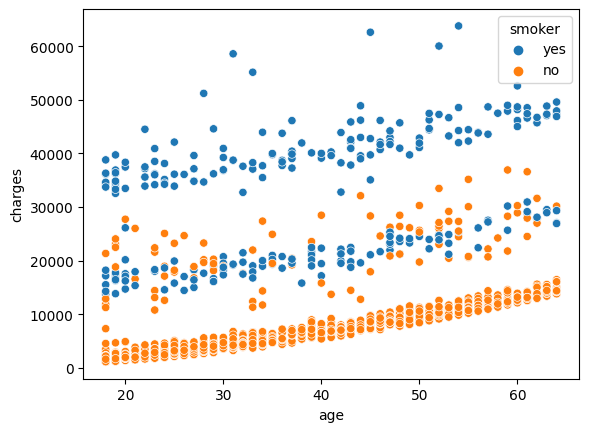

In [ ]:
sns.scatterplot(data=records, x='age', y='charges', hue='smoker')

<Axes: xlabel='age', ylabel='charges'>

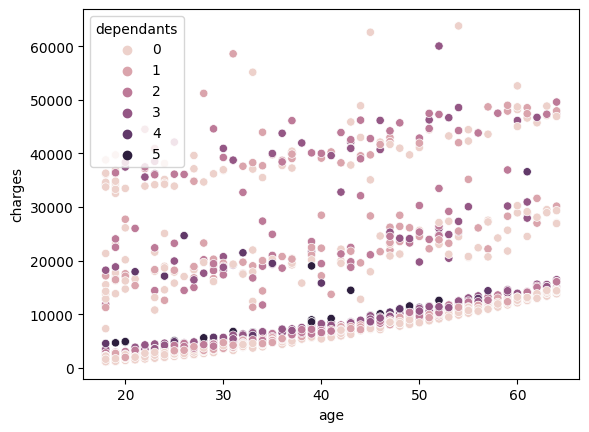

In [ ]:
sns.scatterplot(data=records, x='age', y='charges', hue='dependants') 

<Axes: xlabel='charges', ylabel='smoker'>

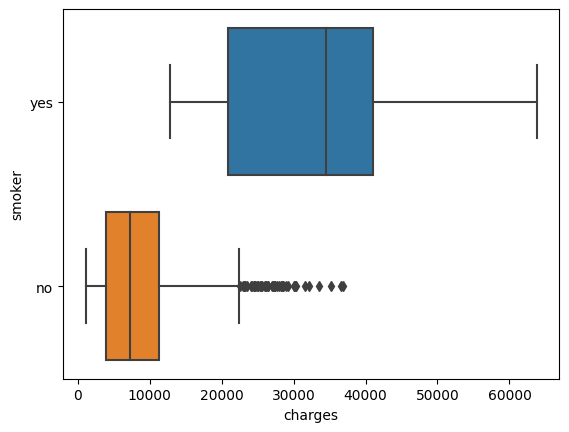

In [ ]:
sns.boxplot(data=records, x='charges', y='smoker')

<AxesSubplot:xlabel='charges', ylabel='region'>

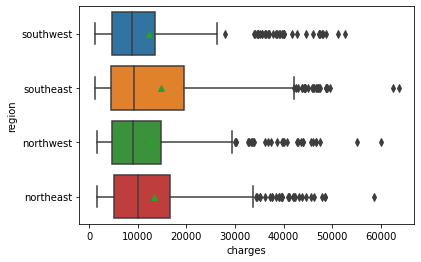

In [ ]:
sns.boxplot(data=records, x='charges', y='region', showmeans=True)

<AxesSubplot:xlabel='charges', ylabel='sex'>

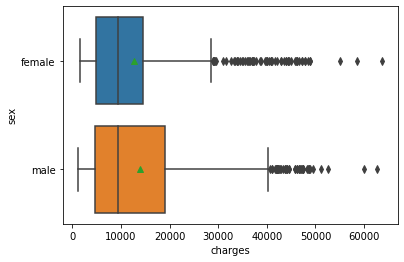

In [ ]:
sns.boxplot(data=records, x='charges', y='sex', showmeans=True)

<ipython-input-148-551c9746ebff>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(data=records.corr(), cmap="Blues",linewidths=.9, annot=True)


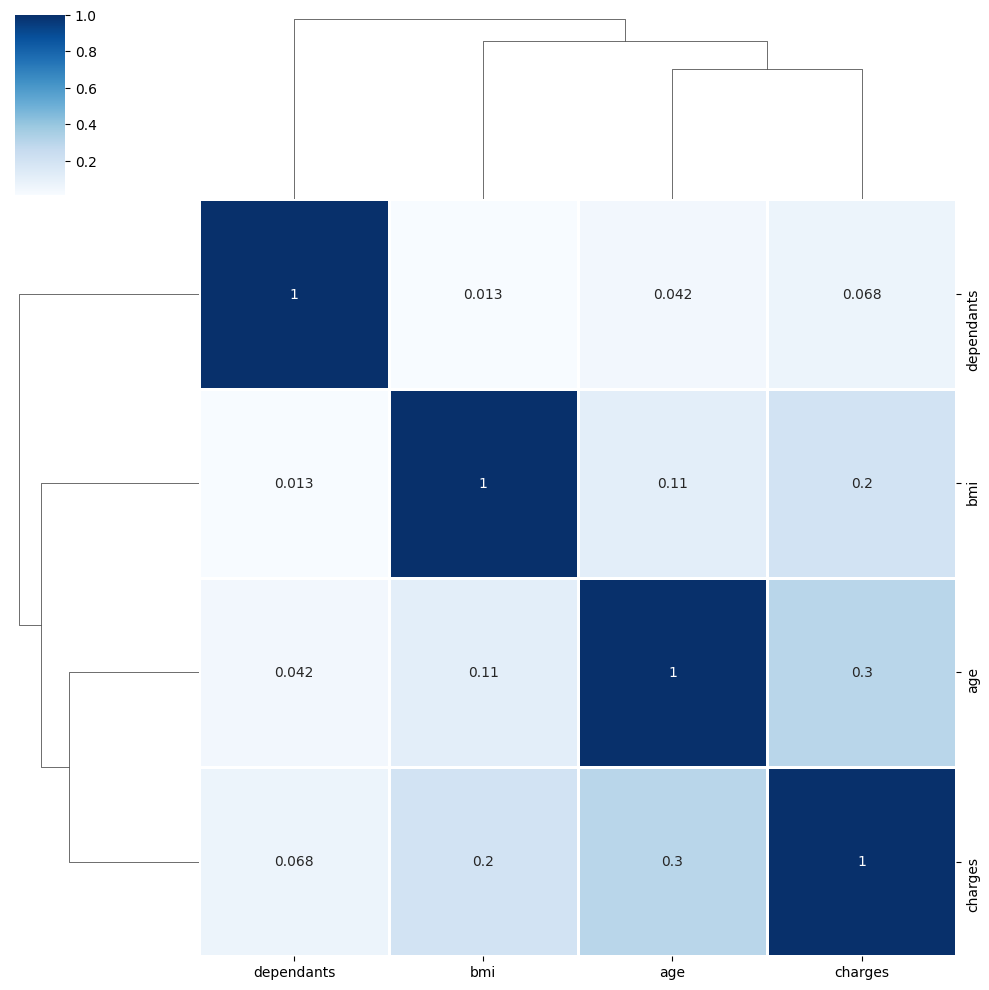

In [ ]:
#visualise clustermap
sns.clustermap(data=records.corr(), cmap="Blues",linewidths=.9, annot=True)

### **Data preparation**

* Feature selection: X
* Target specification: y
* Scale data
* Data spliting: X_train, X_test, y_train, y_test

In [ ]:
#Convert categorical variables to numerical using get dummies
records=pd.get_dummies(records, columns=['sex', 'region'], drop_first=True)

print(records.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   dependants        1338 non-null   int64  
 3   smoker            1338 non-null   object 
 4   charges           1338 non-null   float64
 5   sex_male          1338 non-null   uint8  
 6   region_northwest  1338 non-null   uint8  
 7   region_southeast  1338 non-null   uint8  
 8   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), object(1), uint8(4)
memory usage: 57.6+ KB
None


In [ ]:
#convert categorical data to numerical 
def coding_smoking(x):
    if x=='yes': return 1
    if x=='no': return 0
       
records['smoker'] = records['smoker'].apply(coding_smoking)

In [ ]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   dependants        1338 non-null   int64  
 3   smoker            1338 non-null   int64  
 4   charges           1338 non-null   float64
 5   sex_male          1338 non-null   uint8  
 6   region_northwest  1338 non-null   uint8  
 7   region_southeast  1338 non-null   uint8  
 8   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 57.6 KB


### **Feature selection and data split**

Let's select several features

In [ ]:
from sklearn.model_selection import train_test_split # Import train_test_split function

In [ ]:
# Select relevant features for clustering
features=['age', 'bmi','smoker', 'charges']
X = records[features]

In [ ]:
# Split the data into training and test sets
X_train, X_test = train_test_split(X, test_size=0.35, random_state=2023)

In [ ]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_norm=scaler.fit_transform(X_train)
X_test_norm=scaler.fit_transform(X_test)

## **3.3. K-Means clustering**

### **Model building**

In [ ]:
# Fit K-means clustering model with an initially selected number of clusters
k=4
kmeans = KMeans(n_clusters=k, n_init='auto', max_iter=300, random_state=2023)
kmeans.fit(X_train_norm)

# Add cluster labels to original dataset
X_train['Cluster'] = kmeans.labels_

## **3.4. Performance Evaluation and Optimisation**
* Within-Cluster Sum of Squares
* Silhouette score
* k optimisation


In [ ]:
# Determine optimal number of clusters using the SSE metric
sse_scores = []
best_k=3
best_sse_score=4622.613
for k in range(2, 41):
  kmeans = KMeans(n_clusters=k, n_init='auto', max_iter=300, random_state=2023)
  kmeans.fit(X_train_norm)
  sse_score_k=kmeans.inertia_
  sse_scores.append(sse_score_k)
  if best_sse_score > sse_score_k:
    best_k = k
    best_sse_score = sse_score_k

print('Best k: ', best_k)
print('Best within cluster sum of squarred error score: ', '%.3f' %best_sse_score)

Best k:  40
Best within cluster sum of squarred error score:  144.958


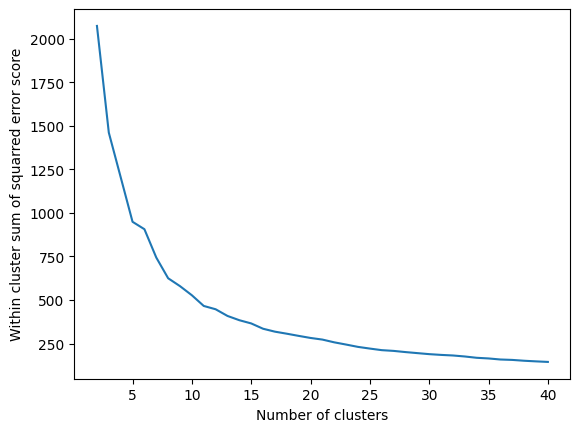

In [ ]:
# Plot the silhouette scores to determine optimal number of clusters
plt.plot(range(2,41), sse_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Within cluster sum of squarred error score")
plt.show()

In [ ]:
# Determine optimal number of clusters using silhouette score
sil_scores = []
best_k=2
best_sil_score=0
for k in range(2, 41):
  kmeans = KMeans(n_clusters=k, n_init='auto', random_state=2023)
  kmeans.fit(X_train_norm)
  sil_score_k=silhouette_score(X_train_norm, kmeans.labels_)
  sil_scores.append(sil_score_k)
  if best_sil_score < sil_score_k:
    best_k = k
    best_sil_score = sil_score_k

print('Best k: ', best_k)
print('Best silhouette score: ', '%.3f' %best_sil_score)

Best k:  2
Best silhouette score:  0.487


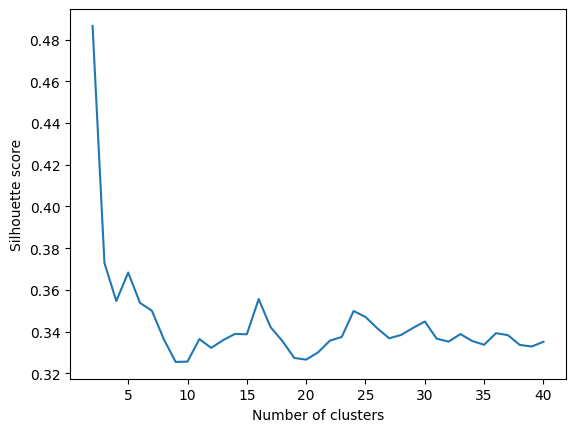

In [ ]:
# Plot the silhouette scores to determine optimal number of clusters
plt.plot(range(2,41), sil_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()



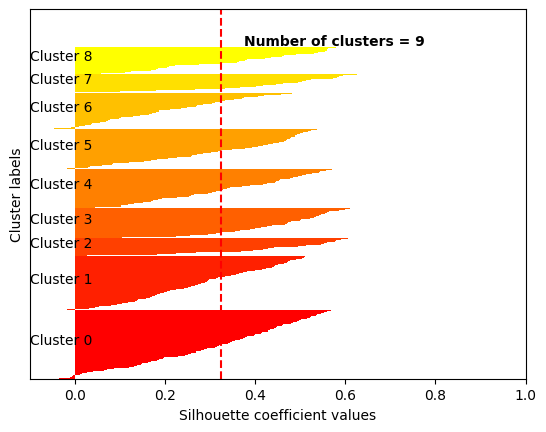

In [ ]:
# Set the number of clusters
n_clusters = 9

# Fit K-means clustering model
kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=2023)
cluster_labels = kmeans.fit_predict(X_train_norm)

# Compute silhouette scores
silhouette_avg = silhouette_score(X_train_norm, cluster_labels)
sample_silhouette_values = silhouette_samples(X_train_norm, cluster_labels)

# Define the colormap, options include: autumn, Spectral, viridis, plasma, cool, jet
cmap = cm.autumn 

# Create a list of evenly spaced values in the range [0, 1]
values = np.linspace(0, 1, n_clusters)

# Plot silhouette diagram
fig, ax = plt.subplots()
y_lower, y_upper = 0, 0
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper += size_cluster_i
    color = cmap(values[i])
    ax.barh(range(y_lower, y_upper), ith_cluster_silhouette_values, height=1.0, 
            edgecolor='none', color=color)
    ax.text(-0.1, (y_lower + y_upper) / 2, 'Cluster ' + str(i), color='black', fontsize=10)
    y_lower += size_cluster_i

ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster labels")
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
ax.set_ylim([0, len(X_train_norm) + (n_clusters + 1) * 10])

ax.text(silhouette_avg + 0.05, len(X_train_norm) + 5, "Number of clusters = %d" % n_clusters, fontsize=10, fontweight='bold')

plt.show()

In [ ]:
# Evaluate the clustering performance on test data using Silhouette score
silhouette_avg = silhouette_score(X_train_norm, cluster_labels)
print("Silhouette score for K-means clustering:", '%.3f' % silhouette_avg)

Silhouette score for K-means clustering: 0.325


In [ ]:
# Predict the clusters for the test data
test_clusters = kmeans.predict(X_test_norm)

In [ ]:
# Evaluate the clustering performance on test data using Silhouette score
silhouette_avg = silhouette_score(X_test_norm, test_clusters)
print("Silhouette score for K-means clustering:", '%.3f' % silhouette_avg)

Silhouette score for K-means clustering: 0.301


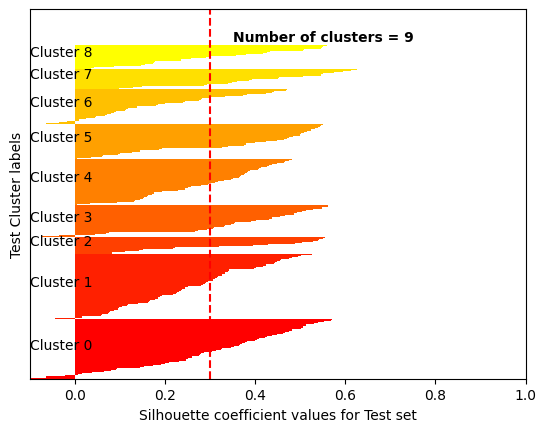

In [ ]:
sample_silhouette_values = silhouette_samples(X_test_norm, test_clusters)

# Define the colormap, options include: autumn, Spectral, viridis, plasma, cool, jet
cmap = cm.autumn 

# Create a list of evenly spaced values in the range [0, 1]
values = np.linspace(0, 1, n_clusters)

# Plot silhouette diagram
fig, ax = plt.subplots()
y_lower, y_upper = 0, 0
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[test_clusters == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper += size_cluster_i
    color = cmap(values[i])
    ax.barh(range(y_lower, y_upper), ith_cluster_silhouette_values, height=1.0, 
            edgecolor='none', color=color)
    ax.text(-0.1, (y_lower + y_upper) / 2, 'Cluster ' + str(i), color='black', fontsize=10)
    y_lower += size_cluster_i

ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_xlabel("Silhouette coefficient values for Test set")
ax.set_ylabel("Test Cluster labels")
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
ax.set_ylim([0, len(X_test_norm) + (n_clusters + 1) * 5])

ax.text(silhouette_avg + 0.05, len(X_test_norm) + 5, "Number of clusters = %d" % n_clusters, fontsize=10, fontweight='bold')

plt.show()

Now that we have Clustered assigned to each data point, we can examine the cluster desriptive stats and visualisation